<a href="https://colab.research.google.com/github/gourav1211/Housing-AI/blob/main/REAL_HOUSE_PRICE_PREDICTION_DATA_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
data = pd.read_csv('/content/Housing.csv')



FileNotFoundError: [Errno 2] No such file or directory: '/content/Housing.csv'

In [ ]:
# Display the first few rows of the dataset
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)



Missing values in each column:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [ ]:
# Convert categorical variables to numerical
# Using pd.get_dummies for binary columns
data_encoded = pd.get_dummies(data, drop_first=True)

In [ ]:
# Display the first few rows of the encoded dataset
data_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data_encoded.drop('price', axis=1)  # Features
y = data_encoded['price']  # Target variable


In [ ]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
print("Training and testing data split successfully.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Training and testing data split successfully.
X_train shape: (436, 13)
X_test shape: (109, 13)
y_train shape: (436,)
y_test shape: (109,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [ ]:
# Fit the model on the training data
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
print("Random Forest model trained successfully.")

Random Forest model trained successfully.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = rf_model.predict(X_test)


In [ ]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 1021546.0353211008
Mean Squared Error (MSE): 1961585044320.3433
R-squared (R2): 0.611918531405699


VISUALIZING PREDICTIONS

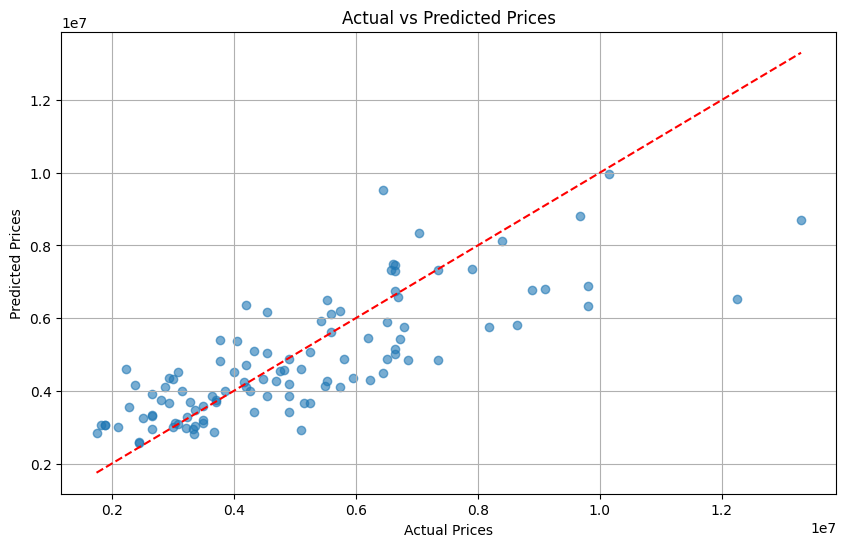

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line for perfect predictions
plt.grid()
plt.show()

Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor()


In [ ]:
print(X_train.shape)  # Should be (n_samples, n_features)
print(y_train.shape)  # Should be (n_samples,)


(436, 13)
(436,)


In [ ]:
print(X_train.dtypes)


area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
parking                            int64
mainroad_yes                        bool
guestroom_yes                       bool
basement_yes                        bool
hotwaterheating_yes                 bool
airconditioning_yes                 bool
prefarea_yes                        bool
furnishingstatus_semi-furnished     bool
furnishingstatus_unfurnished        bool
dtype: object


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the model
model = RandomForestRegressor()

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 648.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
84 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

Best parameters found:  {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


 Feature Importance

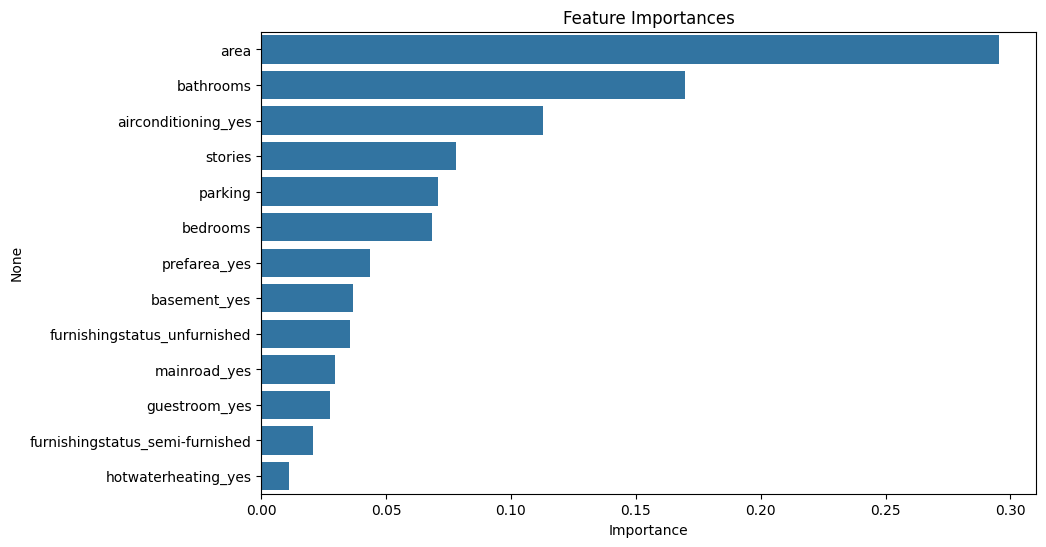

In [ ]:
# After fitting the grid search
best_model = grid_search.best_estimator_  # Get the best model from grid search

# Get feature importances from the best model
importances = best_model.feature_importances_

# Create a DataFrame
feature_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"])
feature_importances.sort_values(by="Importance", ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.Importance, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(model, 'house_price_model.pkl')


['house_price_model.pkl']

In [ ]:
# Load the model
loaded_model = joblib.load('house_price_model.pkl')


CROSS VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated scores:", cv_scores)


Cross-validated scores: [ -2.99013487  -8.48220178 -21.00615283 -17.77273787 -10.70384002]


MODEL COMPARISON

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Train and evaluate other models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor()

# Fit and evaluate
linear_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)  # Corrected this line

# Print MSE for comparison
print("Linear Regression MSE:", mean_squared_error(y_test, linear_model.predict(X_test)))
print("Decision Tree MSE:", mean_squared_error(y_test, decision_tree_model.predict(X_test)))


Linear Regression MSE: 1754318687330.6638
Decision Tree MSE: 2614024802752.2935
